In [10]:
import umap
import umap.plot
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from datasets import get_dataset

/home/neutron/miniconda3/envs/r39/lib/python3.9/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [3]:
# Load AntiMalaria Dataset for visualization
args = lambda: None
args.split = 'train'
args.root = 'data'
args.split_type = 'spectral'
args.fingerprint = 'ecfp'
args.dataset = 'antimalaria'
args.batch_size = 128
args.num_workers = 4

trainloader, validloader, test_loader = get_dataset(args=args)

In [4]:
#Gather all samples in the trainloader
train_x, train_y = [], []
for x, y in trainloader:
    train_x.append(x)
    train_y.append(y)
train_x, train_y = torch.cat(train_x, dim=0), torch.cat(train_y, dim=0)

valid_x, valid_y = [], []
for x, y in validloader:
    valid_x.append(x)
    valid_y.append(y)
valid_x, valid_y = torch.cat(valid_x, dim=0), torch.cat(valid_y, dim=0)

In [5]:
#Generate Visualizations
pca = PCA(n_components=50)
pc_data = pca.fit_transform(torch.cat([train_x, valid_x], dim=0).numpy())
embedding_data = TSNE(n_components=2, init='random', n_iter=2000).fit_transform(pc_data)
embedding_data.shape

(6490, 2)

In [6]:
#Separate embeddings into train and validation set
emb_train_x = embedding_data[:train_x.size(0), :]
emb_valid_x = embedding_data[train_x.size(0):, :]
emb_train_x.shape, emb_valid_x.shape

((4691, 2), (1799, 2))

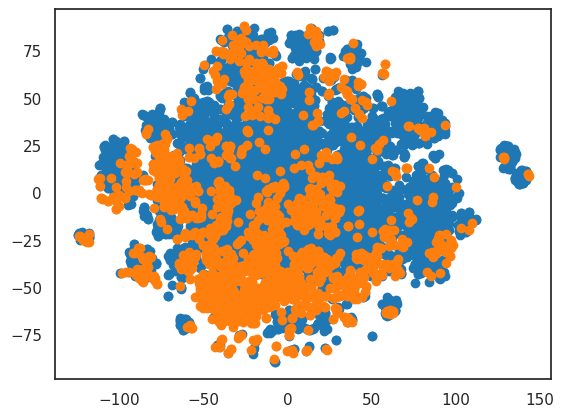

In [7]:
sns.set_theme(style='white')
color = sns.color_palette('tab10')
#plt.figure(figsize=(7, 7))

plt.scatter(x=emb_train_x[:, 0], y=emb_train_x[:, 1], color=color[0])
plt.scatter(x=emb_valid_x[:, 0], y=emb_valid_x[:, 1], color=color[1])

In [8]:
#Try umap
mapper = umap.UMAP().fit(torch.cat([train_x, valid_x], dim=0).numpy())

In [9]:
umap.plot.points(mapper)

AttributeError: module 'umap' has no attribute 'plot'